In [1]:
import math
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
#Neurons for layers
n_hidden_1 = 1024 
n_hidden_2 = 1024 
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024
op_layer = 1024
num_input = 784 
num_classes = 10 

batch_size = 128
epsilon = 1e-3

model_path = "mnist_model.ckpt/"

In [0]:
#Tensorflow inputs
x = tf.placeholder("float", [None, num_input])
y = tf.placeholder("float", [None, num_classes])

st_dev = math.sqrt(2/1024)

# Layer weights and biases initialized
weights = {
    'ip': tf.Variable(tf.truncated_normal([num_input, n_hidden_1], stddev = st_dev)),
    'h1': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = st_dev)),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = st_dev)),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4], stddev = st_dev)),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5], stddev = st_dev)),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_5, op_layer], stddev = st_dev)),
    'op': tf.Variable(tf.truncated_normal([op_layer, num_classes], stddev = st_dev))
}

biases = {
    'ip': tf.Variable(tf.zeros([n_hidden_1])),
    'b1': tf.Variable(tf.zeros([n_hidden_2])),
    'b2': tf.Variable(tf.zeros([n_hidden_3])),
    'b3': tf.Variable(tf.zeros([n_hidden_4])),
    'b4': tf.Variable(tf.zeros([n_hidden_5])),
    'b5': tf.Variable(tf.zeros([op_layer])),
    'op': tf.Variable(tf.zeros([num_classes]))
}

  

In [0]:
layer_ip = tf.nn.relu(tf.matmul(x, weights['ip']) + biases['ip'])

layer_1 = tf.nn.relu(tf.matmul(layer_ip, weights['h1']) + biases['b1'])

layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])

layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])

layer_4 = tf.nn.relu(tf.matmul(layer_3, weights['h4']) + biases['b4'])

layer_5 = tf.nn.relu(tf.matmul(layer_4, weights['h5']) + biases['b5'])

layer_op = tf.matmul(layer_5, weights['op'])+ biases['op']

In [0]:
step = tf.Variable(0, trainable=False)
rate = tf.train.exponential_decay(0.001, step, 1, 0.9999)

logits = layer_op
prediction = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = rate).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)

In [0]:
def train(sess, optimizer, cost, num_epochs):
    b = int(mnist.train.num_examples/batch_size)
    for epoch in range(num_epochs):
        avg_cost = 0
        for _ in range(b):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c/b
        print("Epoch:",(epoch+1), "\tcost=", avg_cost)

In [0]:
def test(prediction, y):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

In [16]:
train(sess, optimizer, cost, 40)

Epoch: 1 	cost= 0.24235504900381005
Epoch: 2 	cost= 0.10704384234870648
Epoch: 3 	cost= 0.07906932768461866
Epoch: 4 	cost= 0.06307207774625986
Epoch: 5 	cost= 0.052379837526130096
Epoch: 6 	cost= 0.04471684408717133
Epoch: 7 	cost= 0.04594552763919548
Epoch: 8 	cost= 0.03835714137613652
Epoch: 9 	cost= 0.03356031687770258
Epoch: 10 	cost= 0.03168148131355089
Epoch: 11 	cost= 0.024206123425073594
Epoch: 12 	cost= 0.030563092680539698
Epoch: 13 	cost= 0.03060332104829785
Epoch: 14 	cost= 0.02651759251840369
Epoch: 15 	cost= 0.02238524464494269
Epoch: 16 	cost= 0.020747988608618335
Epoch: 17 	cost= 0.01913878557826617
Epoch: 18 	cost= 0.020230827194931685
Epoch: 19 	cost= 0.016754465672265566
Epoch: 20 	cost= 0.017967305474962347
Epoch: 21 	cost= 0.018857241996785644
Epoch: 22 	cost= 0.020184371801452727
Epoch: 23 	cost= 0.01488592445026497
Epoch: 24 	cost= 0.020382615695302177
Epoch: 25 	cost= 0.017342666367229684
Epoch: 26 	cost= 0.012167213684526753
Epoch: 27 	cost= 0.0167460244214665

In [17]:
print('Accuracy = ', test(prediction, y))

Accuracy =  0.9838


In [0]:
model = saver.save(sess, model_path)

In [20]:
saver.restore(sess, model)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from mnist_model.ckpt/


In [0]:
si, ui, vi = tf.svd(weights['ip'])

s1, u1, v1 = tf.svd(weights['h1'])

s2, u2, v2 = tf.svd(weights['h2'])

s3, u3, v3 = tf.svd(weights['h3'])

s4, u4, v4 = tf.svd(weights['h4'])

s5, u5, v5 = tf.svd(weights['h5'])

In [0]:
d = tf.placeholder(tf.int32, shape = (), name = "d")

l_ip = tf.nn.relu(tf.matmul(tf.multiply(tf.matmul(x, ui[:,:d]), si[:d]), tf.transpose(vi)[:d,:]) + biases['ip'])

l_1 = tf.nn.relu(tf.matmul(tf.multiply(tf.matmul(l_ip, u1[:,:d]), s1[:d]), tf.transpose(v1)[:d,:]) + biases['b1'])

l_2 = tf.nn.relu(tf.matmul(tf.multiply(tf.matmul(l_1, u2[:,:d]), s2[:d]), tf.transpose(v2)[:d,:]) + biases['b2'])

l_3 = tf.nn.relu(tf.matmul(tf.multiply(tf.matmul(l_2, u3[:,:d]), s3[:d]), tf.transpose(v3)[:d,:]) + biases['b3'])

l_4 = tf.nn.relu(tf.matmul(tf.multiply(tf.matmul(l_3, u4[:,:d]), s4[:d]), tf.transpose(v4)[:d,:]) + biases['b4'])

l_5 = tf.nn.relu(tf.matmul(tf.multiply(tf.matmul(l_4, u5[:,:d]), s5[:d]), tf.transpose(v5)[:d,:]) + biases['b5'])

l_op = tf.matmul(l_5, weights['op'])+ biases['op']

svd_pred = tf.nn.softmax(logits = l_op)

In [0]:
svd_correct_pred = tf.equal(tf.argmax(svd_pred, 1), tf.argmax(y, 1))

svd_acc = tf.reduce_mean(tf.cast(svd_correct_pred, 'float'))

In [0]:
dnum = [10, 20, 50, 100, 200, 1024]
acc = np.zeros(len(dnum))

for i in range(len(dnum)):
    acc[i] = sess.run(svd_acc, feed_dict = {d: dnum[i], x:mnist.test.images, y:mnist.test.labels})

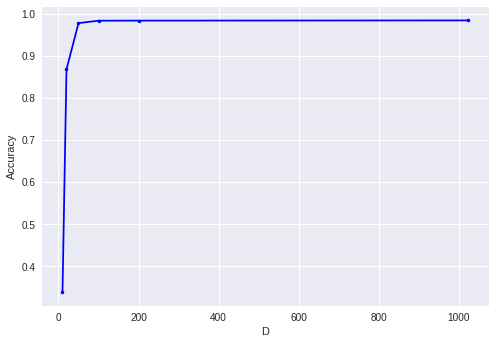

In [26]:
#plt.scatter(x = dnum, y = acc)
plt.plot(dnum, acc, '.b-')
plt.xlabel("D")
plt.ylabel("Accuracy")
plt.show()

In [0]:
Si, Ui, Vi, bi = sess.run([si, ui, vi, biases['ip']])
S1, U1, V1, b1 = sess.run([s1, u1, v1, biases['b1']])
S2, U2, V2, b2 = sess.run([s2, u2, v2, biases['b2']])
S3, U3, V3, b3 = sess.run([s3, u3, v3, biases['b3']])
S4, U4, V4, b4 = sess.run([s4, u4, v4, biases['b4']])
S5, U5, V5, b5 = sess.run([s5, u5, v5, biases['b5']])
Wo, bo = weights['op'], biases['op']

In [0]:
d = 20

Vi = tf.Variable((Si[:d]*Vi[:, :d]).T)
Ui = tf.Variable(Ui[:,:d])
bi = tf.Variable(bi)

V1 = tf.Variable((S1[:d]*V1[:, :d]).T)
U1 = tf.Variable(U1[:,:d])
b1 = tf.Variable(b1)

V2 = tf.Variable((S2[:d]*V2[:, :d]).T)
U2 = tf.Variable(U2[:,:d])
b2 = tf.Variable(b2)

V3 = tf.Variable((S3[:d]*V3[:, :d]).T)
U3 = tf.Variable(U3[:,:d])
b3 = tf.Variable(b3)

V4 = tf.Variable((S4[:d]*V4[:, :d]).T)
U4 = tf.Variable(U4[:,:d])
b4 = tf.Variable(b4)

V5 = tf.Variable((S5[:d]*V5[:, :d]).T)
U5 = tf.Variable(U5[:,:d])
b5 = tf.Variable(b5)

Wo = tf.Variable(W_o)
bo = tf.Variable(b_o)

In [0]:
variable_list_custom = [Ui, Vi, V1, U1, V2, U2, V3, U3, V4, U4, V5, U5, bi, b1, b2, b3, b4, b5, Wo, bo]

# The initializer
init_custom_op = tf.variables_initializer(var_list=variable_list_custom)
sess.run(init_custom_op)

In [0]:
Lip = tf.add(tf.matmul(x,(tf.matmul(Ui,Vi))), bi)
Lip = tf.nn.relu(Lip)

L1 = tf.add(tf.matmul(Lip,(tf.matmul(U1,V1))), b1)
L1 = tf.nn.relu(L1)

L2 = tf.add(tf.matmul(L1,(tf.matmul(U2,V2))), b2)
L2 = tf.nn.relu(L2)

L3 = tf.add(tf.matmul(L2,(tf.matmul(U3,V3))), b3)
L3 = tf.nn.relu(L3)

L4 = tf.add(tf.matmul(L3,(tf.matmul(U4,V4))), b4)
L4 = tf.nn.relu(L4)

L5 = tf.add(tf.matmul(L4,(tf.matmul(U5,V5))), b5)
L5 = tf.nn.relu(L5)

Lop = tf.matmul(L5, Wo)+ bo

d20_pred = tf.nn.softmax(logits = Lop)

In [0]:
rate_d20 = 0.00001

In [0]:
temp = set(tf.global_variables())

cost_d20 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Lop, labels = y))
optimizer_d20 = tf.train.AdamOptimizer(learning_rate = rate_d20).minimize(cost_d20)

sess.run(tf.variables_initializer(set(tf.global_variables()) - temp))

In [54]:
print(sess.run(tf.report_uninitialized_variables()))

[b'Variable_30' b'Variable_31' b'Variable_32' b'Variable_50'
 b'Variable_51' b'Variable_52' b'Variable_68' b'Variable_69']


In [55]:
train(sess, optimizer_d20, cost_d20, 10)

Epoch: 1 	cost= 0.3990439820539704
Epoch: 2 	cost= 0.16587391488757747
Epoch: 3 	cost= 0.13487557564929376
Epoch: 4 	cost= 0.12422159641963762
Epoch: 5 	cost= 0.11062997444109483
Epoch: 6 	cost= 0.10396659110905053
Epoch: 7 	cost= 0.09732670931358306
Epoch: 8 	cost= 0.09073184102791035
Epoch: 9 	cost= 0.0860210142504329
Epoch: 10 	cost= 0.08072952630480272


In [57]:
print('Accuracy before training = ', acc[1])
print('Accuracy after training = ', test(d20_pred, y))

Accuracy before training =  0.8676000237464905
Accuracy after training =  0.9712
